In [52]:
import itertools
import warnings
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt

warnings.filterwarnings("ignore")

In [55]:
air_passengers_data2 = air_passengers_data

In [54]:
air_passengers_data = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)

In [56]:
import pandas as pd

# Suponiendo que air_passengers_data es tu DataFrame
air_passengers_data2.dropna(inplace=True)


Calcular la media móvil de 6 meses: Utiliza el método rolling() de Pandas para calcular la media móvil y asignarla a una nueva columna en el DataFrame.

In [57]:

print(air_passengers_data2)

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]


In [58]:
# Calcular la media móvil de 6 meses (6-month-SMA)
air_passengers_data2['6-month-SMA'] = air_passengers_data2['#Passengers'].rolling(window=6).mean()

# Mostrar el resultado
print(air_passengers_data2)

            #Passengers  6-month-SMA
Month                               
1949-01-01          112          NaN
1949-02-01          118          NaN
1949-03-01          132          NaN
1949-04-01          129          NaN
1949-05-01          121          NaN
...                 ...          ...
1960-08-01          606     519.1667
1960-09-01          508     534.0000
1960-10-01          461     534.0000
1960-11-01          390     520.3333
1960-12-01          432     503.1667

[144 rows x 2 columns]


In [59]:
# Calcular la media móvil de 12 meses (12-month-SMA)
air_passengers_data2['12-month-SMA'] = air_passengers_data2['#Passengers'].rolling(window=12).mean()

<Axes: title={'center': 'Simple Moving Averages'}, xlabel='Month'>

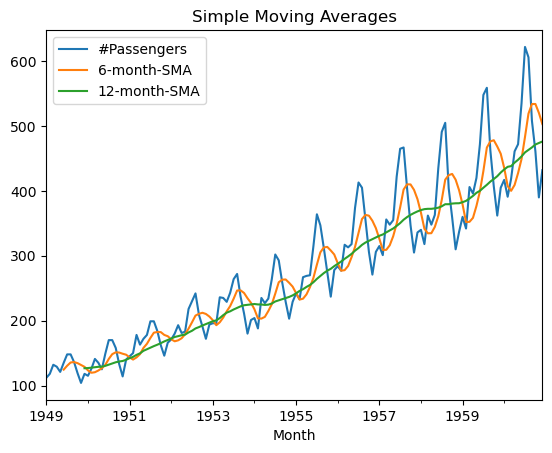

In [60]:
air_passengers_data2.plot(title='Simple Moving Averages')

In [61]:
# Imprimir los nombres de las columnas del DataFrame air_passengers_data2
print(air_passengers_data2.columns)


Index(['#Passengers', '6-month-SMA', '12-month-SMA'], dtype='object')


In [62]:
air_passengers_data2.head(12) 

,#Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.5000,NaN
1949-07-01,148,130.5000,NaN
1949-08-01,148,135.5000,NaN
1949-09-01,136,136.1667,NaN


In [63]:
import pandas as pd

# Suponiendo que air_passengers_data2 es tu DataFrame con los datos
# Asegurarse de que '#Passengers' esté en formato numérico si es necesario
# No necesitas convertir fechas si no estás usando 'Month'

# Calcular la media móvil exponencial ponderada (EWMA) con span de 12 meses para '#Passengers'
air_passengers_data2['ewma12'] = air_passengers_data2['#Passengers'].ewm(span=12, adjust=False).mean()

# Mostrar el DataFrame con las nuevas columnas calculadas
print(air_passengers_data2)


            #Passengers  6-month-SMA  12-month-SMA   ewma12
Month                                                      
1949-01-01          112          NaN           NaN 112.0000
1949-02-01          118          NaN           NaN 112.9231
1949-03-01          132          NaN           NaN 115.8580
1949-04-01          129          NaN           NaN 117.8798
1949-05-01          121          NaN           NaN 118.3599
...                 ...          ...           ...      ...
1960-08-01          606     519.1667      463.3333 494.8986
1960-09-01          508     534.0000      467.0833 496.9142
1960-10-01          461     534.0000      471.5833 491.3890
1960-11-01          390     520.3333      473.9167 475.7907
1960-12-01          432     503.1667      476.1667 469.0536

[144 rows x 4 columns]


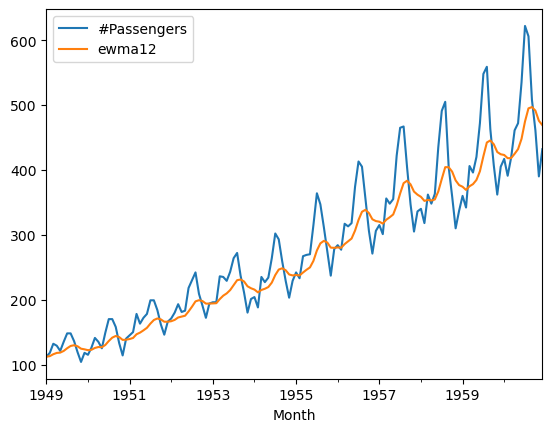

In [64]:
import matplotlib.pyplot as plt

# Suponiendo que air_passengers_data2 es tu DataFrame con las columnas '#Passengers', '6-month-SMA' y '12-month-SMA'

# Calcular la media móvil exponencial ponderada (EWMA) con span de 12 meses para '#Passengers'
air_passengers_data2['ewma12'] = air_passengers_data2['#Passengers'].ewm(span=12, adjust=False).mean()

# Trazar solo las columnas 'Thousands of Passengers' y 'ewma12'
air_passengers_data2[['#Passengers', 'ewma12']].plot()

# Mostrar la gráfica
plt.show()


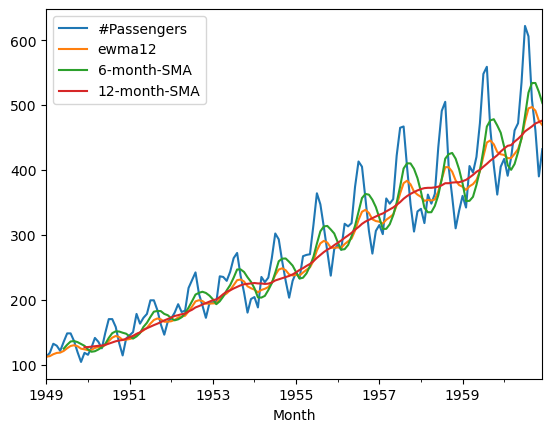

In [65]:
import matplotlib.pyplot as plt

# Trazar las columnas '#Passengers', 'ewma12', '6-month-SMA', '12-month-SMA' de air_passengers_data2
air_passengers_data2[['#Passengers', 'ewma12', '6-month-SMA', '12-month-SMA']].plot()

# Mostrar la gráfica
plt.show()


In [66]:
# set the span and the smoothing factor alpha
span = 12
alpha = 2/(span+1)

In [67]:
air_passengers_data2.columns

Index(['#Passengers', '6-month-SMA', '12-month-SMA', 'ewma12'], dtype='object')

In [68]:
# Set the frequency of the date time index as Monthly start as indicated by the data
air_passengers_data2.index.freq = 'MS'

In [69]:
air_passengers_data2.columns

Index(['#Passengers', '6-month-SMA', '12-month-SMA', 'ewma12'], dtype='object')

In [70]:
air_passengers_data2.head()

,#Passengers,6-month-SMA,12-month-SMA,ewma12
Month,,,,
1949-01-01,112,NaN,NaN,112.0000
1949-02-01,118,NaN,NaN,112.9231
1949-03-01,132,NaN,NaN,115.8580
1949-04-01,129,NaN,NaN,117.8798
1949-05-01,121,NaN,NaN,118.3599


In [71]:
air_passengers_data2.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01', '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01', '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01'], dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [72]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Asumiendo que '#Passengers' es la columna que quieres suavizar
alpha = 2/(12 + 1)  # Definir el nivel de suavizado (alpha)

# Aplicar el suavizado exponencial simple (SES)
air_passengers_data2['SES12'] = SimpleExpSmoothing(air_passengers_data2['#Passengers']).fit(smoothing_level=alpha, optimized=False).fittedvalues.shift(-1)

# Mostrar el DataFrame con la nueva columna 'SES12'
print(air_passengers_data2)


            #Passengers  6-month-SMA  12-month-SMA   ewma12    SES12
Month                                                               
1949-01-01          112          NaN           NaN 112.0000 112.0000
1949-02-01          118          NaN           NaN 112.9231 112.9231
1949-03-01          132          NaN           NaN 115.8580 115.8580
1949-04-01          129          NaN           NaN 117.8798 117.8798
1949-05-01          121          NaN           NaN 118.3599 118.3599
...                 ...          ...           ...      ...      ...
1960-08-01          606     519.1667      463.3333 494.8986 494.8986
1960-09-01          508     534.0000      467.0833 496.9142 496.9142
1960-10-01          461     534.0000      471.5833 491.3890 491.3890
1960-11-01          390     520.3333      473.9167 475.7907 475.7907
1960-12-01          432     503.1667      476.1667 469.0536      NaN

[144 rows x 5 columns]


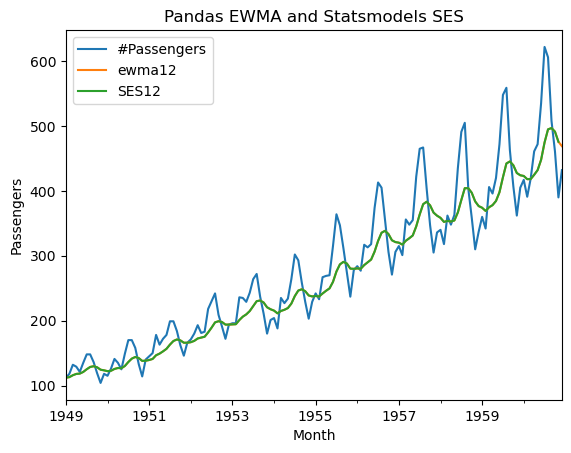

In [73]:
import matplotlib.pyplot as plt

# Suponiendo que air_passengers_data2 es tu DataFrame con las columnas '#Passengers', '6-month-SMA', '12-month-SMA', 'ewma12' y 'SES12'
# Asegúrate de que 'Month' esté en formato datetime si ya no lo está
# No necesitas convertir fechas si no estás usando 'Month'

# Trazar las columnas '#Passengers', 'ewma12' y 'SES12'
air_passengers_data2[['#Passengers', 'ewma12', 'SES12']].plot(title='Pandas EWMA and Statsmodels SES',
                                                             xlabel='Month', ylabel='Passengers')

# Mostrar la gráfica
plt.show()


<Figure size 1000x600 with 0 Axes>

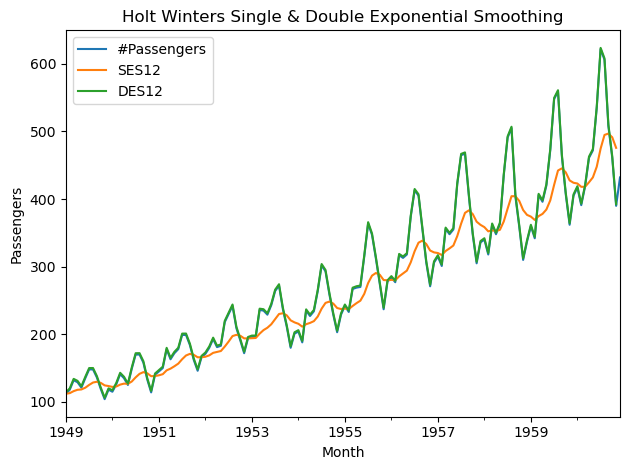

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Asumiendo que air_passengers_data2 es tu DataFrame con la columna '#Passengers'
# Asegurarse de que 'Month' esté en formato datetime si no lo está ya
# No necesitas convertir fechas si no estás usando 'Month'

# Aplicar Single Exponential Smoothing (SES)
alpha = 2/(12 + 1)  # Nivel de suavizado para SES
air_passengers_data2['SES12'] = SimpleExpSmoothing(air_passengers_data2['#Passengers']).fit(smoothing_level=alpha, optimized=False).fittedvalues.shift(-1)

# Aplicar Double Exponential Smoothing (DES)
model_des = ExponentialSmoothing(air_passengers_data2['#Passengers'], trend='add')
air_passengers_data2['DES12'] = model_des.fit().fittedvalues.shift(-1)

# Trazar los resultados
plt.figure(figsize=(10, 6))

# Gráfico de todas las series
air_passengers_data2[['#Passengers', 'SES12', 'DES12']].plot(title='Holt Winters Single & Double Exponential Smoothing', xlabel='Month', ylabel='Passengers')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

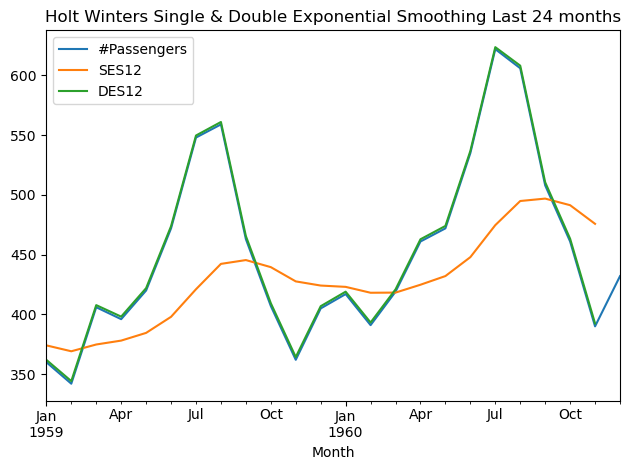

In [75]:
import matplotlib.pyplot as plt

# Suponiendo que 'air_passengers_data2' es tu DataFrame con las columnas '#Passengers', 'SES12' y 'DES12'
# Asegúrate de que 'Month' esté en formato datetime si no lo está ya
# No necesitas convertir fechas si no estás usando 'Month'

# Trazar los últimos 24 meses
plt.figure(figsize=(10, 6))
air_passengers_data2[['#Passengers', 'SES12', 'DES12']].iloc[-24:].plot(title='Holt Winters Single & Double Exponential Smoothing Last 24 months')

# Ajustar automáticamente los límites del eje x
plt.autoscale(axis='x', tight=True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [76]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Asumiendo que 'air_passengers_data2' es tu DataFrame con la columna '#Passengers'
# Asegúrate de que 'Month' esté en formato datetime si no lo está ya
# No necesitas convertir fechas si no estás usando 'Month'

# Aplicar Double Exponential Smoothing con tendencia multiplicativa (DES)
model_des_mul = ExponentialSmoothing(air_passengers_data2['#Passengers'], trend='mul')
air_passengers_data2['DES12_mul'] = model_des_mul.fit().fittedvalues.shift(-1)

# Mostrar el DataFrame actualizado
print(air_passengers_data2)


            #Passengers  6-month-SMA  12-month-SMA   ewma12    SES12    DES12  DES12_mul
Month                                                                                   
1949-01-01          112          NaN           NaN 112.0000 112.0000 114.1024   113.9907
1949-02-01          118          NaN           NaN 112.9231 112.9231 120.0407   120.0317
1949-03-01          132          NaN           NaN 115.8580 115.8580 134.0015   134.2360
1949-04-01          129          NaN           NaN 117.8798 117.8798 131.0858   131.2708
1949-05-01          121          NaN           NaN 118.3599 118.3599 123.1103   123.1563
...                 ...          ...           ...      ...      ...      ...        ...
1960-08-01          606     519.1667      463.3333 494.8986 494.8986 608.1688   616.6737
1960-09-01          508     534.0000      467.0833 496.9142 496.9142 510.5714   517.3786
1960-10-01          461     534.0000      471.5833 491.3890 491.3890 463.3135   469.2910
1960-11-01          3

<Figure size 1000x600 with 0 Axes>

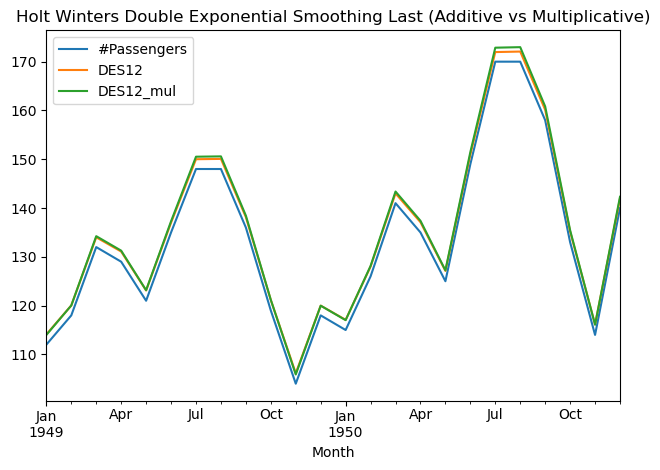

In [77]:
import matplotlib.pyplot as plt

# Suponiendo que 'air_passengers_data2' es tu DataFrame con las columnas '#Passengers', 'DES12' y 'DES12_mul'
# Asegúrate de que 'Month' esté en formato datetime si no lo está ya
# No necesitas convertir fechas si no estás usando 'Month'

# Trazar los últimos 24 meses
plt.figure(figsize=(10, 6))
air_passengers_data2[['#Passengers', 'DES12', 'DES12_mul']].iloc[:24].plot(title='Holt Winters Double Exponential Smoothing Last (Additive vs Multiplicative)')

# Ajustar automáticamente los límites del eje x
plt.autoscale(axis='x', tight=True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [78]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Asumiendo que 'air_passengers_data2' es tu DataFrame con la columna '#Passengers'
# Asegúrate de que 'Month' esté en formato datetime si no lo está ya
# No necesitas convertir fechas si no estás usando 'Month'

# Aplicar Triple Exponential Smoothing (Holt-Winters con estacionalidad aditiva)
model_tes_add = ExponentialSmoothing(air_passengers_data2['#Passengers'], trend='add', seasonal='add', seasonal_periods=12)
air_passengers_data2['TESadd12'] = model_tes_add.fit().fittedvalues

# Mostrar el DataFrame actualizado
print(air_passengers_data2)


            #Passengers  6-month-SMA  12-month-SMA   ewma12    SES12    DES12  DES12_mul  TESadd12
Month                                                                                             
1949-01-01          112          NaN           NaN 112.0000 112.0000 114.1024   113.9907  112.0070
1949-02-01          118          NaN           NaN 112.9231 112.9231 120.0407   120.0317  120.1493
1949-03-01          132          NaN           NaN 115.8580 115.8580 134.0015   134.2360  134.6933
1949-04-01          129          NaN           NaN 117.8798 117.8798 131.0858   131.2708  131.3677
1949-05-01          121          NaN           NaN 118.3599 118.3599 123.1103   123.1563  124.6251
...                 ...          ...           ...      ...      ...      ...        ...       ...
1960-08-01          606     519.1667      463.3333 494.8986 494.8986 608.1688   616.6737  608.2326
1960-09-01          508     534.0000      467.0833 496.9142 496.9142 510.5714   517.3786  507.6576
1960-10-01

In [20]:
import pandas as pd

# Cargar el dataset desde un archivo CSV
air_passengers_data3 = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)

# Ajustar la frecuencia del índice a 'MS' (inicio de mes)
air_passengers_data3.index.freq = 'MS'

# Mostrar las primeras filas del DataFrame para verificar
print(air_passengers_data3.head())


            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [21]:
air_passengers_data3.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01', '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01', '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01'], dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [22]:
air_passengers_data3.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [23]:
# Number of months of data 
len(air_passengers_data3)

144

In [24]:
# Split into train and test set
train_airline = air_passengers_data3[:108] 
test_airline = air_passengers_data3[108:]

In [25]:
len(test_airline)

36

In [26]:
fitted_model = ExponentialSmoothing(train_airline['#Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [27]:
test_predictions = fitted_model.forecast(36).rename('HW Test Forecast')

In [28]:
test_predictions[:10]

1958-01-01   356.9686
1958-02-01   344.5888
1958-03-01   405.7183
1958-04-01   400.6108
1958-05-01   409.0016
1958-06-01   480.6941
1958-07-01   530.4700
1958-08-01   523.2884
1958-09-01   454.2105
1958-10-01   392.5180
Freq: MS, Name: HW Test Forecast, dtype: float64

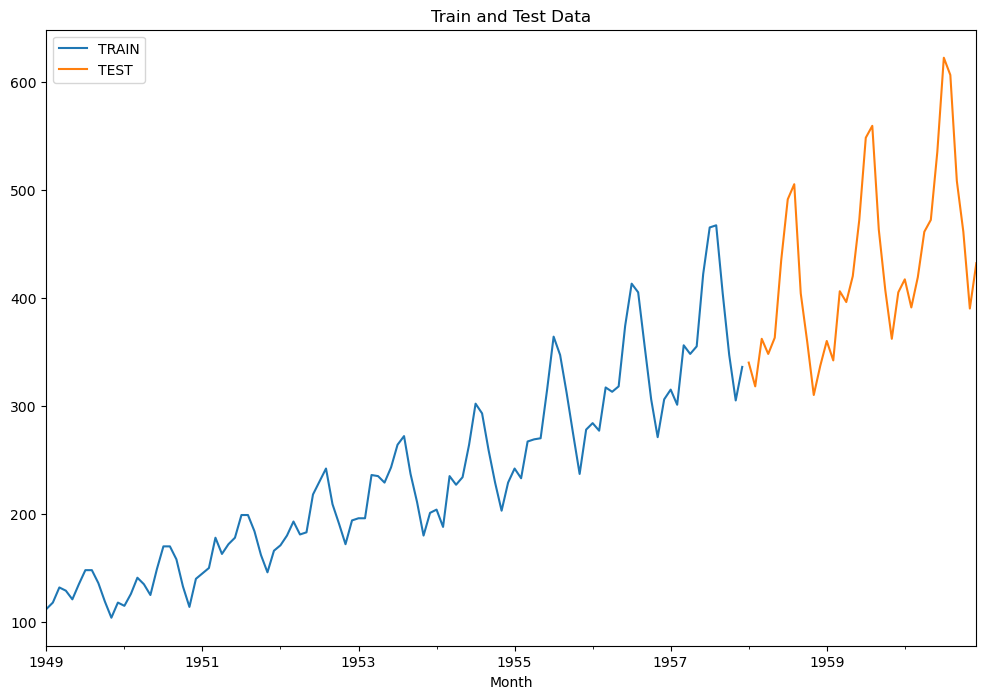

In [29]:
train_airline['#Passengers'].plot(legend=True,label='TRAIN')
test_airline['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
plt.title('Train and Test Data');

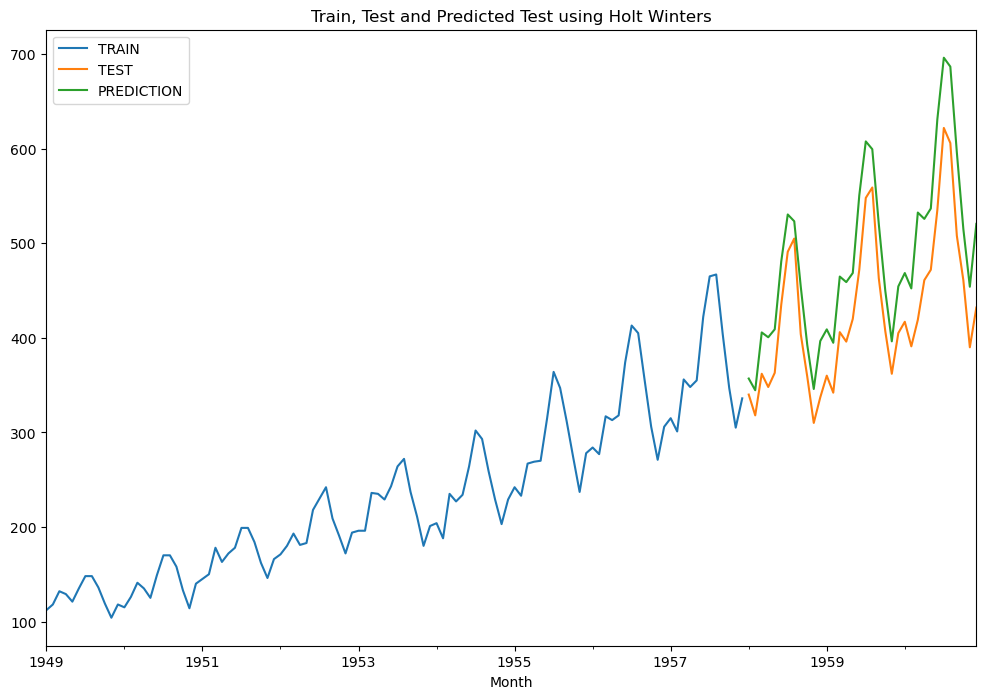

In [30]:
train_airline['#Passengers'].plot(legend=True,label='TRAIN')
test_airline['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters');

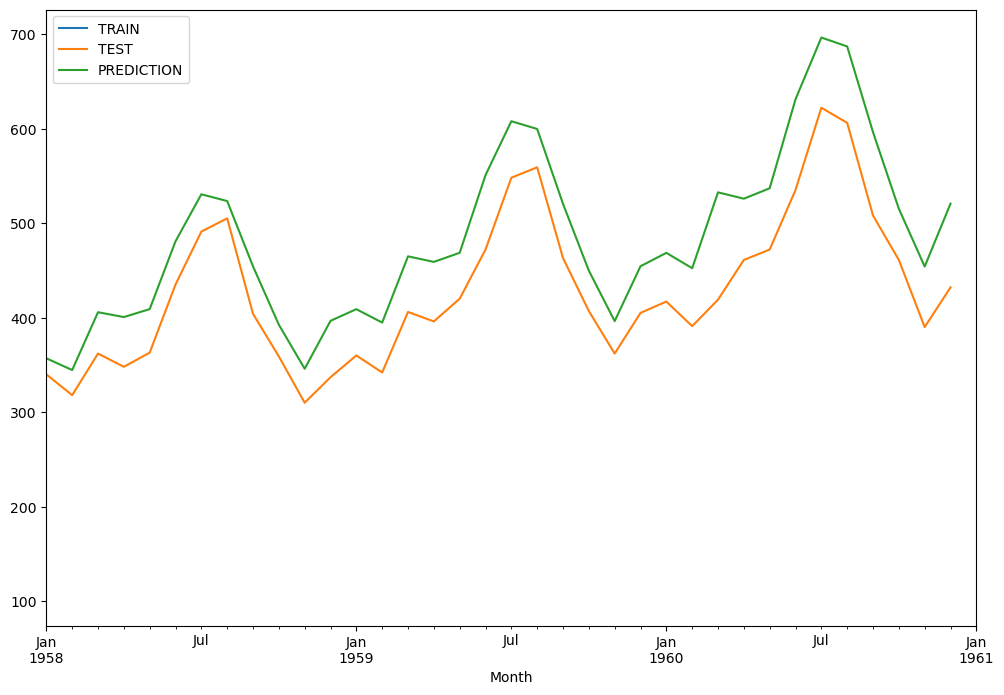

In [31]:
train_airline['#Passengers'].plot(legend=True,label='TRAIN')
test_airline['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [33]:
print(f'Mean Absolute Error = {mean_absolute_error(test_airline,test_predictions)}')

Mean Absolute Error = 55.69782636118518


In [34]:
from sklearn.metrics import median_absolute_error

# Suponiendo que test_airline y test_predictions son tus datos reales y predichos respectivamente

# Calcula el MAD
mad = median_absolute_error(test_airline, test_predictions)

print(f'Median Absolute Deviation (MAD) = {mad}')


Median Absolute Deviation (MAD) = 52.693361455245736


In [35]:
from sklearn.metrics import mean_absolute_error

# Suponiendo que test_airline y test_predictions son tus datos reales y predichos respectivamente

# Calcula el MAE
mae = mean_absolute_error(test_airline, test_predictions)

# Calcula el MAPE
mape = np.mean(np.abs((test_airline - test_predictions) / test_airline)) * 100

print(f'Mean Absolute Error = {mae}')
print(f'Mean Absolute Percentage Error (MAPE) = {mape}')


Mean Absolute Error = 55.69782636118518
Mean Absolute Percentage Error (MAPE) = 1958-01-01 00:00:00   NaN
1958-02-01 00:00:00   NaN
1958-03-01 00:00:00   NaN
1958-04-01 00:00:00   NaN
1958-05-01 00:00:00   NaN
1958-06-01 00:00:00   NaN
1958-07-01 00:00:00   NaN
1958-08-01 00:00:00   NaN
1958-09-01 00:00:00   NaN
1958-10-01 00:00:00   NaN
1958-11-01 00:00:00   NaN
1958-12-01 00:00:00   NaN
1959-01-01 00:00:00   NaN
1959-02-01 00:00:00   NaN
1959-03-01 00:00:00   NaN
1959-04-01 00:00:00   NaN
1959-05-01 00:00:00   NaN
1959-06-01 00:00:00   NaN
1959-07-01 00:00:00   NaN
1959-08-01 00:00:00   NaN
1959-09-01 00:00:00   NaN
1959-10-01 00:00:00   NaN
1959-11-01 00:00:00   NaN
1959-12-01 00:00:00   NaN
1960-01-01 00:00:00   NaN
1960-02-01 00:00:00   NaN
1960-03-01 00:00:00   NaN
1960-04-01 00:00:00   NaN
1960-05-01 00:00:00   NaN
1960-06-01 00:00:00   NaN
1960-07-01 00:00:00   NaN
1960-08-01 00:00:00   NaN
1960-09-01 00:00:00   NaN
1960-10-01 00:00:00   NaN
1960-11-01 00:00:00   NaN
1960-12-01

In [36]:
print(f'Mean Squared Error = {mean_squared_error(test_airline,test_predictions)}')


Mean Squared Error = 3525.867525316523


In [37]:
# Calcular el MAPE
mape = mean_absolute_percentage_error(test_airline['#Passengers'], test_predictions)
print(f'Mean Absolute Percentage Error (MAPE) = {mape:.2f}%')

NameError: name 'mean_absolute_percentage_error' is not defined

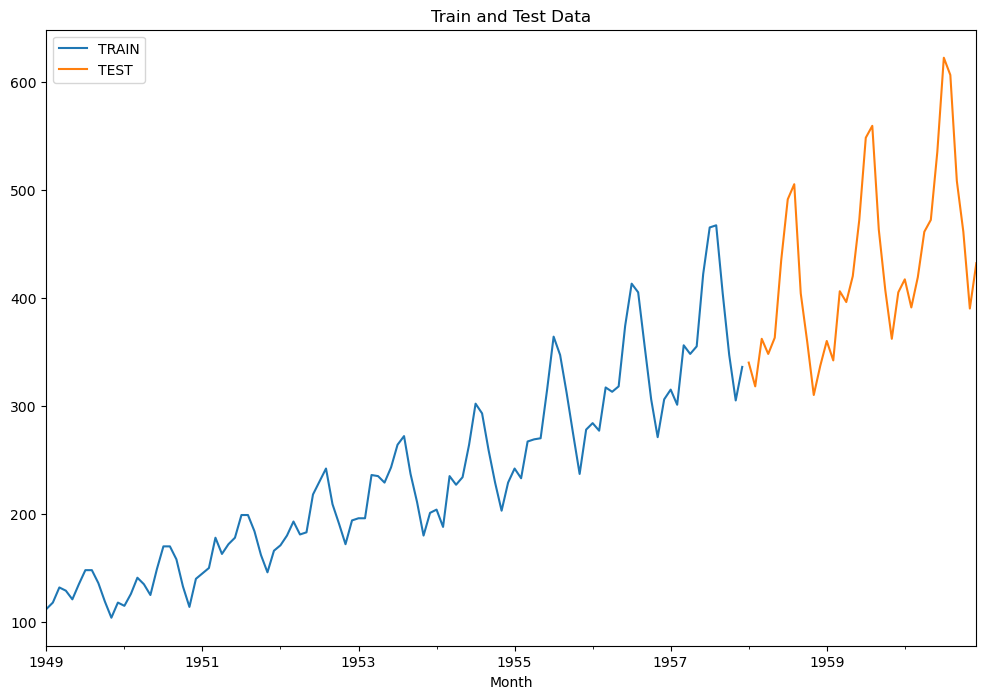

Mean Absolute Percentage Error (MAPE) = 0.13%


In [38]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error

# Ajustar el modelo ExponentialSmoothing a los datos de entrenamiento
fitted_model = ExponentialSmoothing(train_airline['#Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

# Predecir en los datos de prueba
test_predictions = fitted_model.forecast(len(test_airline))

# Calcular el MAPE
mape = mean_absolute_percentage_error(test_airline['#Passengers'], test_predictions)

# Graficar los datos de entrenamiento y prueba
train_airline['#Passengers'].plot(legend=True, label='TRAIN')
test_airline['#Passengers'].plot(legend=True, label='TEST', figsize=(12, 8))
plt.title('Train and Test Data')
plt.show()

print(f'Mean Absolute Percentage Error (MAPE) = {mape:.2f}%')



In [39]:
test_airline.describe()


,#Passengers
count,36.0000
mean,428.5000
std,79.3292
min,310.0000
25%,362.0000
50%,412.0000
75%,472.0000
max,622.0000


In [40]:
final_model = ExponentialSmoothing(air_passengers_data3['#Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [41]:
forecast_predictions = final_model.forecast(steps=36)

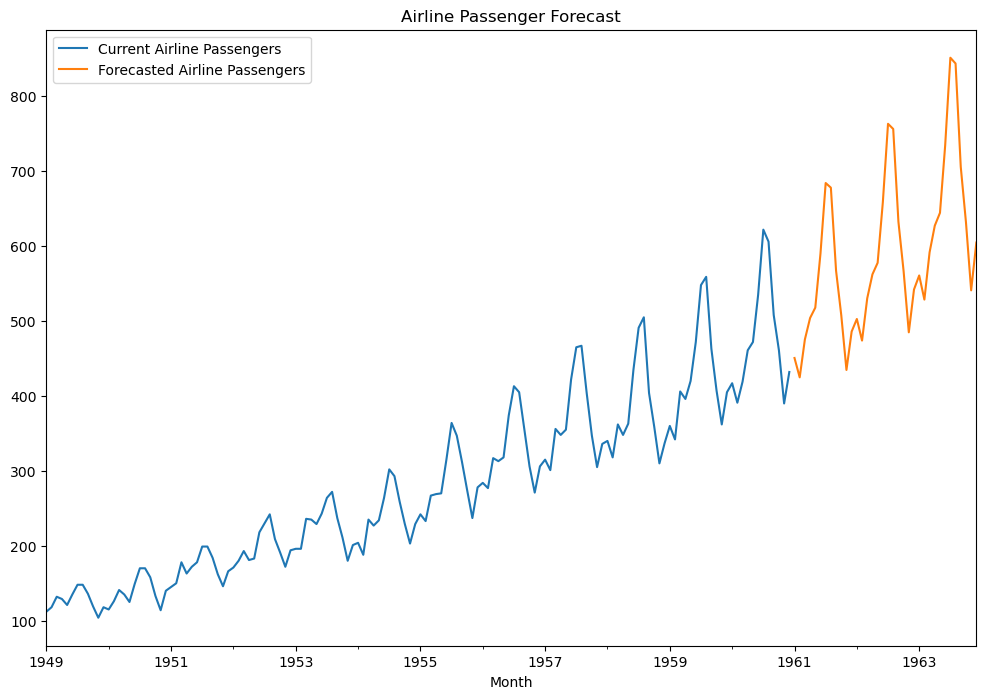

In [42]:
air_passengers_data3['#Passengers'].plot(figsize=(12,8),legend=True,label='Current Airline Passengers')
forecast_predictions.plot(legend=True,label='Forecasted Airline Passengers')
plt.title('Airline Passenger Forecast');

In [43]:
import numpy as np

# Suponiendo que air_passengers_data3['#Passengers'] son los valores reales y forecast_predictions son las predicciones del modelo
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calcular MAPE
mape = mean_absolute_percentage_error(air_passengers_data3['#Passengers'], forecast_predictions)
print(f'Mean Absolute Percentage Error (MAPE) = {mape:.2f}%')


Mean Absolute Percentage Error (MAPE) = nan%


In [44]:
# Añadir una pequeña constante epsilon para evitar división por cero
epsilon = 1e-10  # Pequeña constante aditiva

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calcular MAPE con corrección
mape = mean_absolute_percentage_error(air_passengers_data3['#Passengers'], forecast_predictions)
print(f'Mean Absolute Percentage Error (MAPE) = {mape:.2f}%')


Mean Absolute Percentage Error (MAPE) = nan%


Mean Absolute Percentage Error (MAPE) = nan%
Mean Absolute Deviation (MAD) = nan


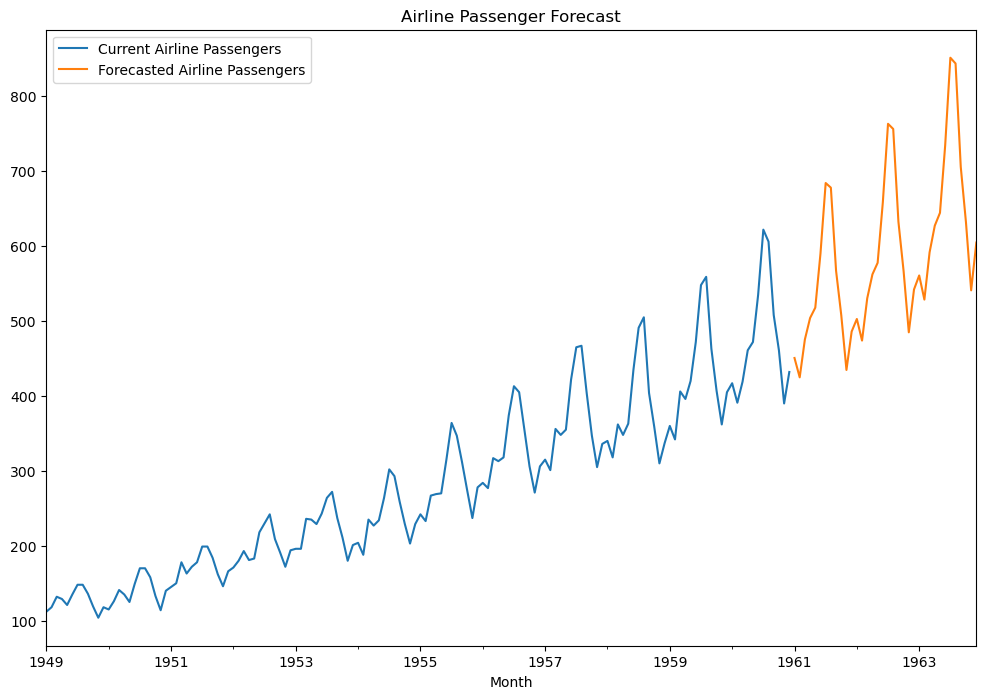

In [45]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Suponiendo que air_passengers_data3 es tu DataFrame con los datos
# Ajustar el modelo ExponentialSmoothing
final_model = ExponentialSmoothing(air_passengers_data3['#Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

# Generar predicciones
forecast_predictions = final_model.forecast(steps=36)

# Calcular MAPE con corrección para evitar división por cero
epsilon = 1e-10  # Pequeña constante aditiva
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calcular MAPE con corrección
mape = mean_absolute_percentage_error(air_passengers_data3['#Passengers'], forecast_predictions)
print(f'Mean Absolute Percentage Error (MAPE) = {mape:.2f}%')

# Calcular MAD
mad = np.mean(np.abs(forecast_predictions - air_passengers_data3['#Passengers']))
print(f'Mean Absolute Deviation (MAD) = {mad:.2f}')

# Graficar resultados
plt.figure(figsize=(12, 8))
air_passengers_data3['#Passengers'].plot(legend=True, label='Current Airline Passengers')
forecast_predictions.plot(legend=True, label='Forecasted Airline Passengers')
plt.title('Airline Passenger Forecast')
plt.show()


In [46]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Suponiendo que air_passengers_data3 es tu DataFrame con los datos
# Asegurémonos de que 'Month' esté como índice en formato datetime
air_passengers_data3.index = pd.to_datetime(air_passengers_data3.index)

# Definir las fechas de inicio y fin para las predicciones
start_date = air_passengers_data3.index[-1] + pd.DateOffset(months=1)  # Empieza justo después de la última fecha en el índice
end_date = start_date + pd.DateOffset(months=35)  # Predice para los próximos 36 meses (3 años)

# Ajustar el modelo ExponentialSmoothing
final_model = ExponentialSmoothing(air_passengers_data3['#Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

# Generar predicciones
forecast_predictions = final_model.predict(start=start_date, end=end_date)


In [47]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# Suponiendo que tienes un conjunto de datos de prueba llamado 'test' con los valores reales
# En este caso, podrías usar una validación cruzada o dividir tus datos de series de tiempo en entrenamiento y prueba
# Dependiendo de cómo hayas organizado tus datos.

# Calcular MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Suponiendo que 'test' son los valores reales de los pasajeros para el período de predicción
# En este ejemplo, puedes usar un conjunto de datos de validación cruzada o separar datos de series de tiempo en entrenamiento y prueba.
# air travel's



In [48]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Suponiendo que air_passengers_data3 es tu DataFrame con los datos
# Asegurémonos de que 'Month' esté como índice en formato datetime
air_passengers_data3.index = pd.to_datetime(air_passengers_data3.index)

# Definir las fechas de inicio y fin para las predicciones
start_date = air_passengers_data3.index[-1] + pd.DateOffset(months=1)  # Empieza justo después de la última fecha en el índice
end_date = start_date + pd.DateOffset(months=35)  # Predice para los próximos 36 meses (3 años)

# Ajustar el modelo ExponentialSmoothing
final_model = ExponentialSmoothing(air_passengers_data3['#Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

# Generar predicciones
forecast_predictions = final_model.predict(start=start_date, end=end_date)



In [49]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# Suponiendo que 'test' son los valores reales de los pasajeros para el período de predicción
# En este ejemplo, puedes usar un conjunto de datos de validación cruzada o separar datos de series de tiempo en entrenamiento y prueba.

# Calcular MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Suponiendo que 'test' son los valores reales de los pasajeros para el período de predicción
# En este ejemplo, puedes usar un conjunto de datos de validación cruzada o separar datos de series de tiempo en entrenamiento y prueba.
# air travel's


In [80]:
#import numpy as np

#def mean_absolute_percentage_error(y_true, y_pred):
   # return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Suponiendo que tienes los datos reales en 'test_airline' y las predicciones en 'test_predictions'
#mape = mean_absolute_percentage_error(test_airline, test_predictions)
#print(f'Mean Absolute Percentage Error (MAPE) = {mape:.2f}%')


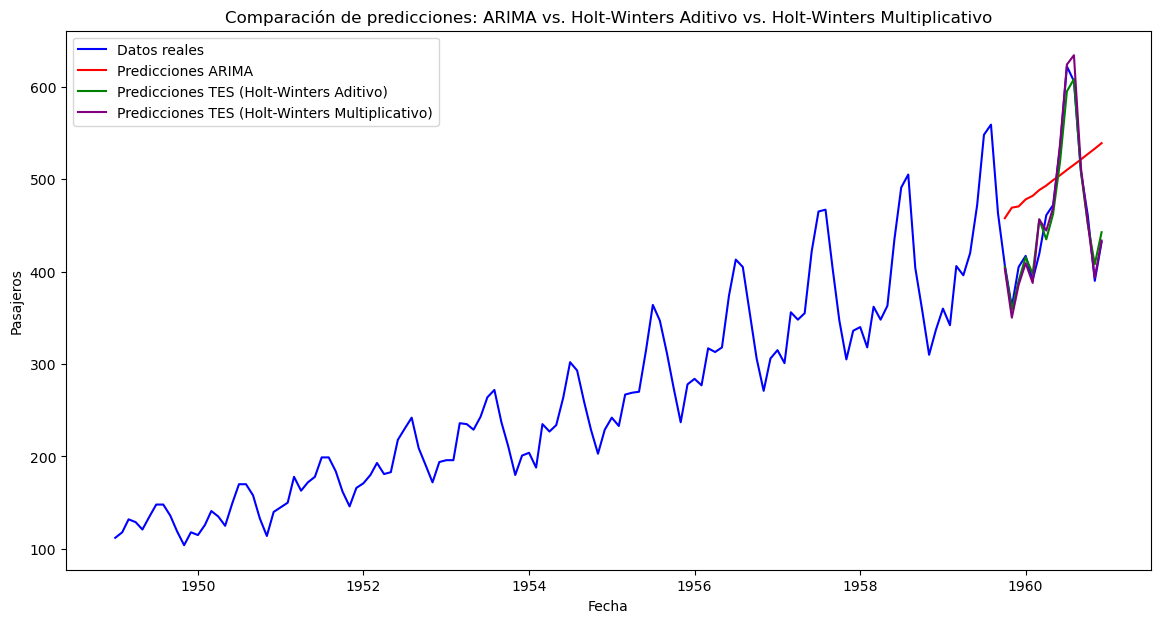


Métricas de error para ARIMA:
MAPE: 0.1616
MAD: 71.0975
Desviación estándar: 68.8051

Métricas de error para Holt-Winters Aditivo:
MAPE: 0.0270
MAD: 12.3083
Desviación estándar: 16.0903

Métricas de error para Holt-Winters Multiplicativo:
MAPE: 0.0228
MAD: 10.2538
Desviación estándar: 14.5750


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

# Cargar el dataset desde un archivo CSV
air_passengers_data = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)
air_passengers_data.index.freq = 'MS'

# Transformación logarítmica de los datos para el modelo ARIMA
air_passengers_data_log_scaled = np.log(air_passengers_data['#Passengers'])

# Dividir los datos en entrenamiento y prueba (90% train, 10% test)
train, test = train_test_split(air_passengers_data_log_scaled, test_size=0.10, shuffle=False)

# Ajustar el modelo ARIMA
order = (1, 2, 2)
model_arima = ARIMA(train, order=order)
model_arima_fit = model_arima.fit()

# Predicciones con ARIMA en el rango de fechas especificado
start_date = '1959-10-01'
end_date = '1960-12-01'
predictions_arima_log = model_arima_fit.predict(start=start_date, end=end_date)
predictions_arima = np.exp(predictions_arima_log)  # Transformar de vuelta a la escala original

# Ajustar el modelo de Exponential Smoothing aditivo
model_tes_add = ExponentialSmoothing(air_passengers_data['#Passengers'], trend='add', seasonal='add', seasonal_periods=12)
fit_tes_add = model_tes_add.fit()

# Predicciones con TES aditivo en el rango de fechas especificado
predictions_tes_add = fit_tes_add.predict(start=start_date, end=end_date)

# Ajustar el modelo de Exponential Smoothing multiplicativo
train_airline = air_passengers_data[:int(0.9*len(air_passengers_data))]
model_tes_mul = ExponentialSmoothing(train_airline['#Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

# Predicciones con TES multiplicativo en el rango de fechas especificado
predictions_tes_mul = model_tes_mul.predict(start=start_date, end=end_date)

# Calcular las métricas de error
actual_values = air_passengers_data.loc[start_date:end_date, '#Passengers']

mape_arima = mean_absolute_percentage_error(actual_values, predictions_arima)
mape_tes_add = mean_absolute_percentage_error(actual_values, predictions_tes_add)
mape_tes_mul = mean_absolute_percentage_error(actual_values, predictions_tes_mul)

mad_arima = mean_absolute_error(actual_values, predictions_arima)
mad_tes_add = mean_absolute_error(actual_values, predictions_tes_add)
mad_tes_mul = mean_absolute_error(actual_values, predictions_tes_mul)

std_arima = np.std(actual_values - predictions_arima)
std_tes_add = np.std(actual_values - predictions_tes_add)
std_tes_mul = np.std(actual_values - predictions_tes_mul)

# Graficar los resultados
plt.figure(figsize=(14, 7))

# Graficar datos reales
plt.plot(air_passengers_data.index, air_passengers_data['#Passengers'], label='Datos reales', color='blue')

# Graficar predicciones ARIMA
plt.plot(pd.date_range(start=start_date, end=end_date, freq='MS'), predictions_arima, label='Predicciones ARIMA', color='red')

# Graficar predicciones TES aditivo
plt.plot(pd.date_range(start=start_date, end=end_date, freq='MS'), predictions_tes_add, label='Predicciones TES (Holt-Winters Aditivo)', color='green')

# Graficar predicciones TES multiplicativo
plt.plot(pd.date_range(start=start_date, end=end_date, freq='MS'), predictions_tes_mul, label='Predicciones TES (Holt-Winters Multiplicativo)', color='purple')

# Añadir leyenda y etiquetas
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.title('Comparación de predicciones: ARIMA vs. Holt-Winters Aditivo vs. Holt-Winters Multiplicativo')
plt.show()

# Mostrar métricas de error
print("\nMétricas de error para ARIMA:")
print(f"MAPE: {mape_arima:.4f}")
print(f"MAD: {mad_arima:.4f}")
print(f"Desviación estándar: {std_arima:.4f}")

print("\nMétricas de error para Holt-Winters Aditivo:")
print(f"MAPE: {mape_tes_add:.4f}")
print(f"MAD: {mad_tes_add:.4f}")
print(f"Desviación estándar: {std_tes_add:.4f}")

print("\nMétricas de error para Holt-Winters Multiplicativo:")
print(f"MAPE: {mape_tes_mul:.4f}")
print(f"MAD: {mad_tes_mul:.4f}")
print(f"Desviación estándar: {std_tes_mul:.4f}")


In [ ]:
# Cargar el dataset desde un archivo CSV
#air_passengers_data = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)
#air_passengers_data.index.freq = 'MS'

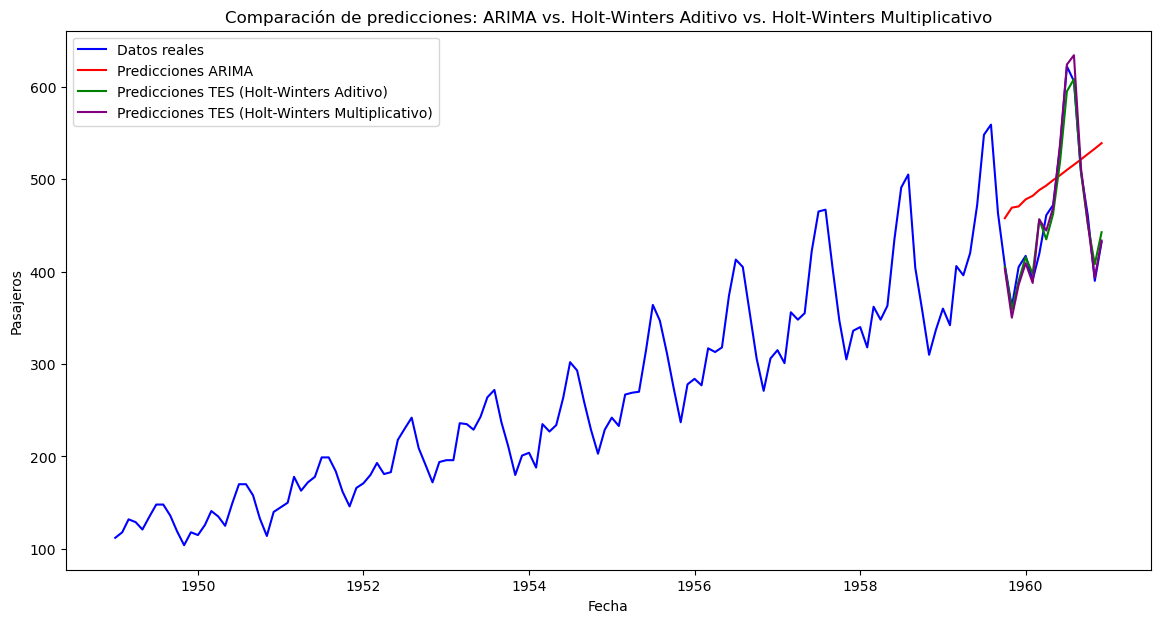


Métricas de error para ARIMA:
MAPE: 0.1616
MAD: 71.0975
Desviación estándar: 68.8051

Métricas de error para Holt-Winters Aditivo:
MAPE: 0.0270
MAD: 12.3083
Desviación estándar: 16.0903

Métricas de error para Holt-Winters Multiplicativo:
MAPE: 0.0228
MAD: 10.2538
Desviación estándar: 14.5750


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error



# Transformación logarítmica de los datos para el modelo ARIMA
air_passengers_data_log_scaled = np.log(air_passengers_data['#Passengers'])

# Dividir los datos en entrenamiento y prueba (90% train, 10% test)
train, test = train_test_split(air_passengers_data_log_scaled, test_size=0.10, shuffle=False)

# Ajustar el modelo ARIMA
order = (1, 2, 2)
model_arima = ARIMA(train, order=order)
model_arima_fit = model_arima.fit()

# Predicciones con ARIMA en el rango de fechas especificado
start_date = '1959-10-01'
end_date = '1960-12-01'
predictions_arima_log = model_arima_fit.predict(start=start_date, end=end_date)
predictions_arima = np.exp(predictions_arima_log)  # Transformar de vuelta a la escala original

# Ajustar el modelo de Exponential Smoothing aditivo
model_tes_add = ExponentialSmoothing(air_passengers_data['#Passengers'], trend='add', seasonal='add', seasonal_periods=12)
fit_tes_add = model_tes_add.fit()

# Predicciones con TES aditivo en el rango de fechas especificado
predictions_tes_add = fit_tes_add.predict(start=start_date, end=end_date)

# Ajustar el modelo de Exponential Smoothing multiplicativo
train_airline = air_passengers_data[:int(0.9*len(air_passengers_data))]
model_tes_mul = ExponentialSmoothing(train_airline['#Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

# Predicciones con TES multiplicativo en el rango de fechas especificado
predictions_tes_mul = model_tes_mul.predict(start=start_date, end=end_date)

# Calcular las métricas de error
actual_values = air_passengers_data.loc[start_date:end_date, '#Passengers']

mape_arima = mean_absolute_percentage_error(actual_values, predictions_arima)
mape_tes_add = mean_absolute_percentage_error(actual_values, predictions_tes_add)
mape_tes_mul = mean_absolute_percentage_error(actual_values, predictions_tes_mul)

mad_arima = mean_absolute_error(actual_values, predictions_arima)
mad_tes_add = mean_absolute_error(actual_values, predictions_tes_add)
mad_tes_mul = mean_absolute_error(actual_values, predictions_tes_mul)

std_arima = np.std(actual_values - predictions_arima)
std_tes_add = np.std(actual_values - predictions_tes_add)
std_tes_mul = np.std(actual_values - predictions_tes_mul)

# Graficar los resultados
plt.figure(figsize=(14, 7))

# Graficar datos reales
plt.plot(air_passengers_data.index, air_passengers_data['#Passengers'], label='Datos reales', color='blue')

# Graficar predicciones ARIMA
plt.plot(pd.date_range(start=start_date, end=end_date, freq='MS'), predictions_arima, label='Predicciones ARIMA', color='red')

# Graficar predicciones TES aditivo
plt.plot(pd.date_range(start=start_date, end=end_date, freq='MS'), predictions_tes_add, label='Predicciones TES (Holt-Winters Aditivo)', color='green')

# Graficar predicciones TES multiplicativo
plt.plot(pd.date_range(start=start_date, end=end_date, freq='MS'), predictions_tes_mul, label='Predicciones TES (Holt-Winters Multiplicativo)', color='purple')

# Añadir leyenda y etiquetas
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.title('Comparación de predicciones: ARIMA vs. Holt-Winters Aditivo vs. Holt-Winters Multiplicativo')
plt.show()

# Mostrar métricas de error
print("\nMétricas de error para ARIMA:")
print(f"MAPE: {mape_arima:.4f}")
print(f"MAD: {mad_arima:.4f}")
print(f"Desviación estándar: {std_arima:.4f}")

print("\nMétricas de error para Holt-Winters Aditivo:")
print(f"MAPE: {mape_tes_add:.4f}")
print(f"MAD: {mad_tes_add:.4f}")
print(f"Desviación estándar: {std_tes_add:.4f}")

print("\nMétricas de error para Holt-Winters Multiplicativo:")
print(f"MAPE: {mape_tes_mul:.4f}")
print(f"MAD: {mad_tes_mul:.4f}")
print(f"Desviación estándar: {std_tes_mul:.4f}")



El mejor modelo es Holt-Winters Multiplicativo, ya que tiene los valores más bajos de MAPE,                                   MAD y desviación estándar. Esto indica que este modelo no solo tiene el error porcentual más bajo,
sino también el error absoluto más bajo y los errores más consistentes.
